In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.set_figure_params(dpi=80, facecolor="white")
sc.logging.print_header()


pandas	2.3.3
scanpy	1.11.5
matplotlib	3.10.8
----	----
debugpy	1.8.19
numpy	1.26.4
legacy-api-wrap	1.5
platformdirs	4.5.0
isal	0.0.0 (1.8.0)
ipython	8.21.0
igraph	1.0.0
zarr	3.1.5
numba	0.63.1
defusedxml	0.7.1
stack_data	0.6.3
decorator	5.2.1
psutil	7.2.1
pure_eval	0.2.3
leidenalg	0.11.0
jupyter_core	5.9.1
python-dateutil	2.9.0.post0
argcomplete	3.6.3
xarray	2025.12.0
joblib	1.5.2
natsort	8.4.0
fast-array-utils	1.2.3
texttable	1.7.0
executing	2.2.1
llvmlite	0.46.0
ipykernel	7.1.0
jupyter_client	8.6.3
wcwidth	0.2.14
cloudpickle	3.1.2
six	1.17.0
prompt_toolkit	3.0.52
pytz	2025.2
tornado	6.5.4
parso	0.8.5
session-info2	0.3
packaging	25.0
traitlets	5.9.0
pyarrow	22.0.0
google-crc32c	1.8.0
kiwisolver	1.4.9
fsspec	2026.1.0
donfig	0.8.1.post1
Pygments	2.19.2
scipy	1.16.3
cycler	0.12.1
msgpack	1.1.2
pyzmq	27.1.0
colorama	0.4.6
asttokens	3.0.1
matplotlib-inline	0.2.1
anndata	0.12.0
jedi	0.19.2
pyparsing	3.2.5
h5py	3.13.0
numcodecs	0.14.1
pickleshare	0.7.5
plotly	6.5.0
setuptools	80.9.0
pillow	11.3.0
comm	0.2.3
PyYAML	6.0.3
threadpoolctl	3.6.0
scikit-learn	1.8.0
typing_extensions	4.15.0
----	----
Python	3.12.12 | packaged by conda-forge | (main, Oct 22 2025, 23:25:55) [GCC 14.3.0]
OS	Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.39
CPU	16 logical CPU cores
GPU	ID: 0, NVIDIA GeForce RTX 2070, Driver: 591.74, Memory: 8192 MiB
Updated	2026-01-21 01:37

In [13]:
print(os.getcwd())
adata = sc.read_10x_mtx(
    "data/gse294482/pbs1/GSE294482_RAW/",  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,  # write a cache file for faster subsequent reading
)


/mnt/d/Work/singlecell-python-cookbook/02_packages/scanpy
... reading from cache file cache/data-gse294482-pbs1-GSE294482_RAW-matrix.h5ad


In [14]:
adata


AnnData object with n_obs × n_vars = 6732 × 32285
    var: 'gene_ids', 'feature_types'

In [15]:
adata.var_names_make_unique()
# adata.X = adata.X.astype("int32") # needed to match R results
adata


AnnData object with n_obs × n_vars = 6732 × 32285
    var: 'gene_ids', 'feature_types'

normalizing counts per cell
    finished (0:00:00)


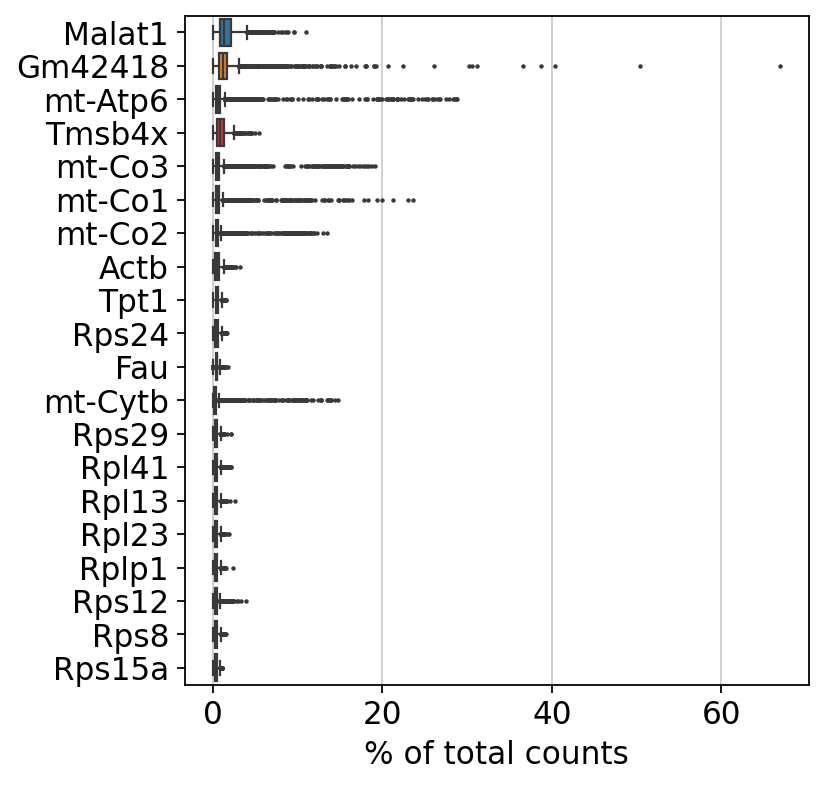

filtered out 47 cells that have less than 200 genes expressed
filtered out 9779 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 6685 × 22506
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells'

In [16]:
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.filter_cells(adata, min_genes=200)  # this does nothing, in this specific case
sc.pp.filter_genes(adata, min_cells=3)
adata


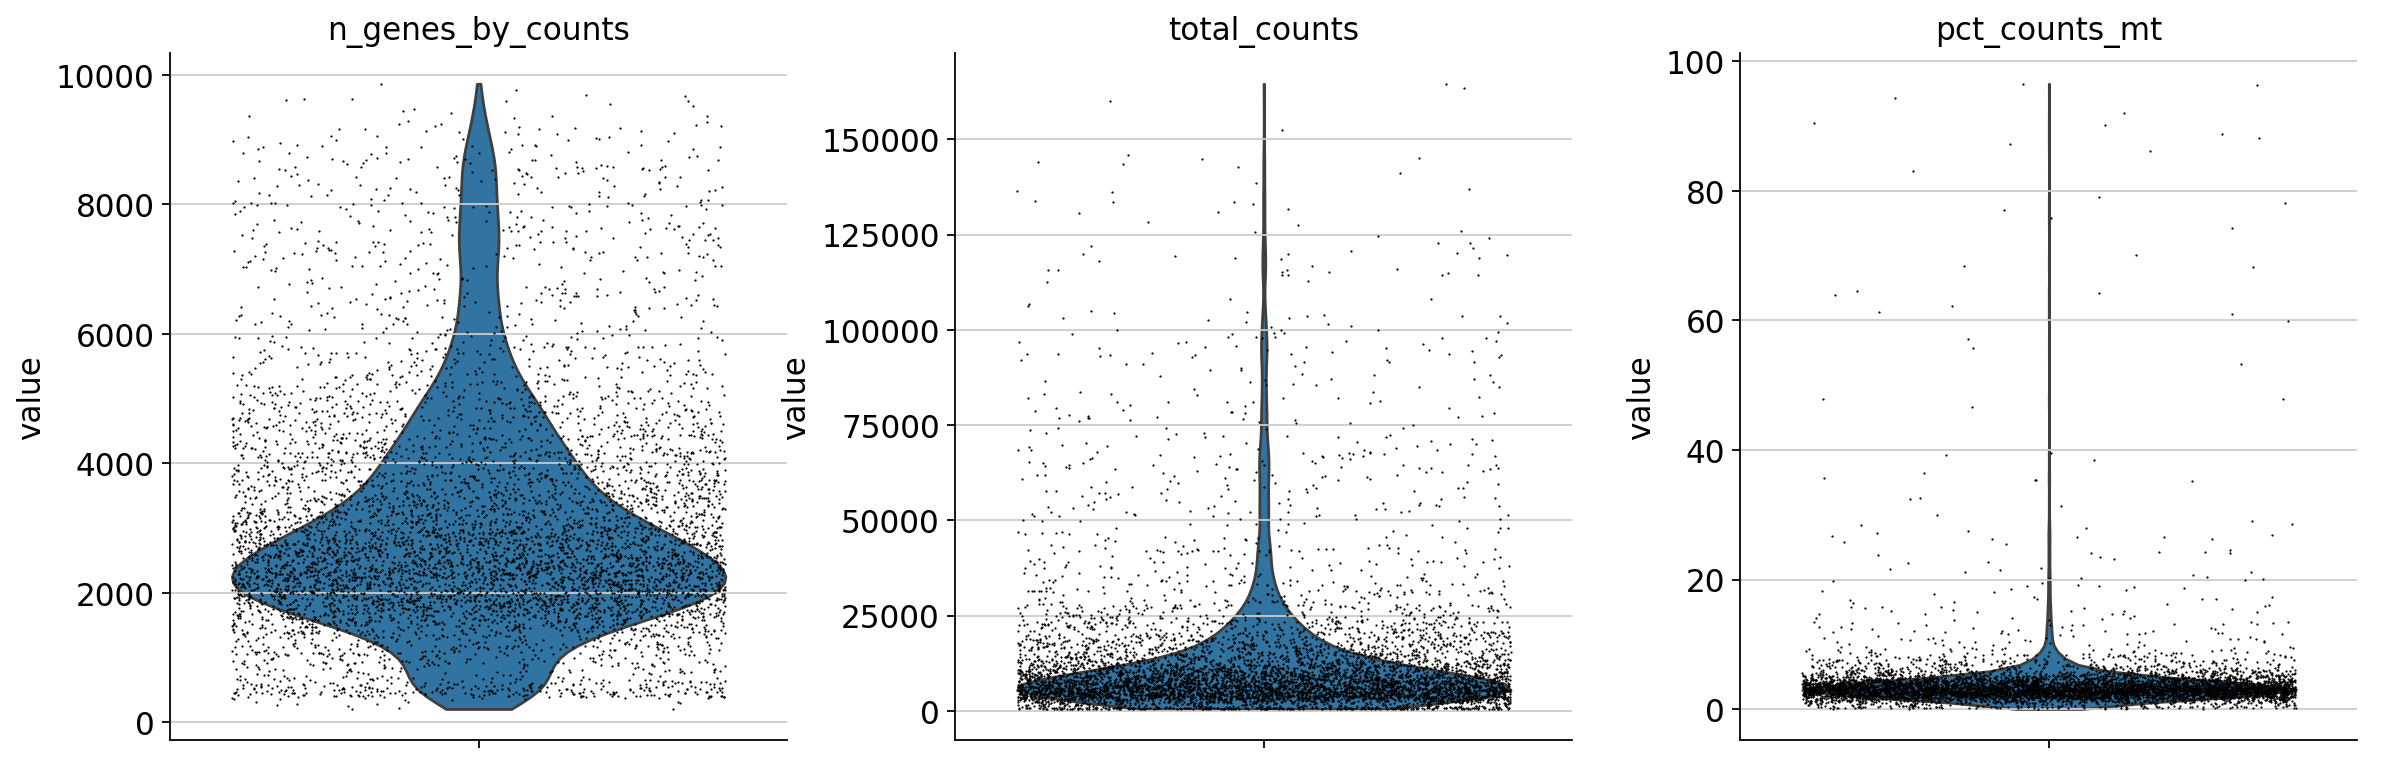

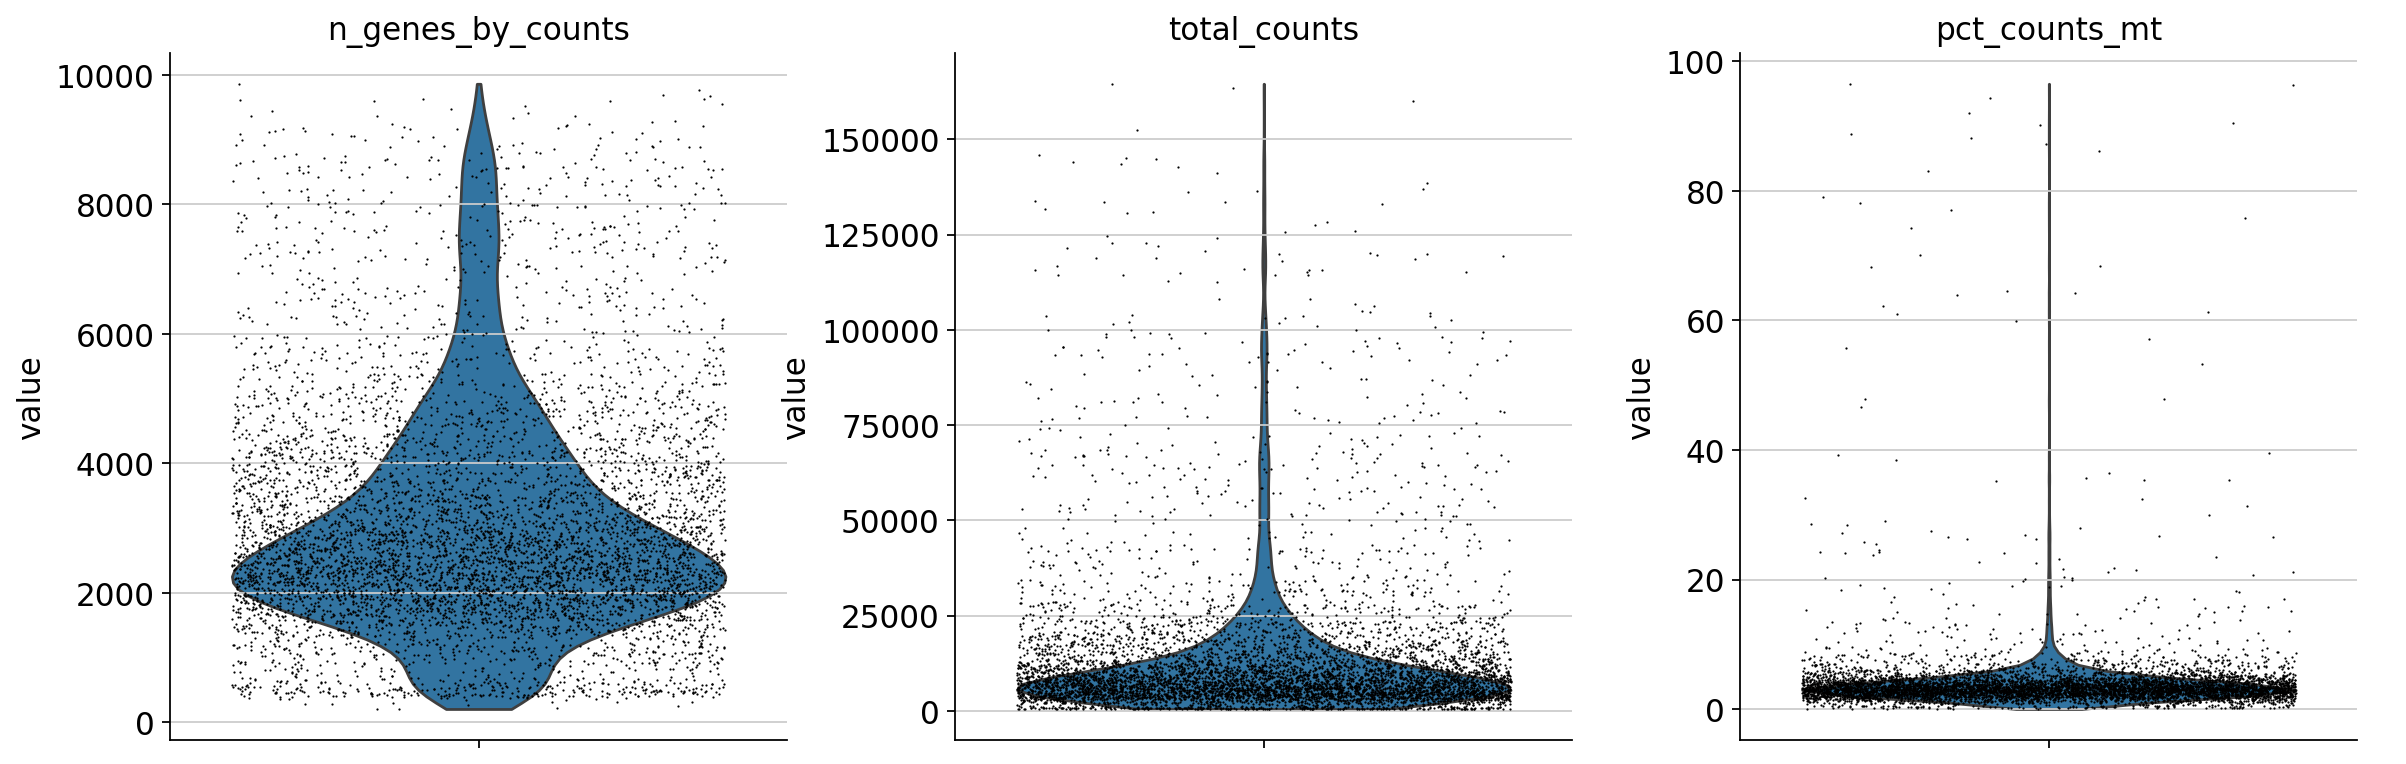

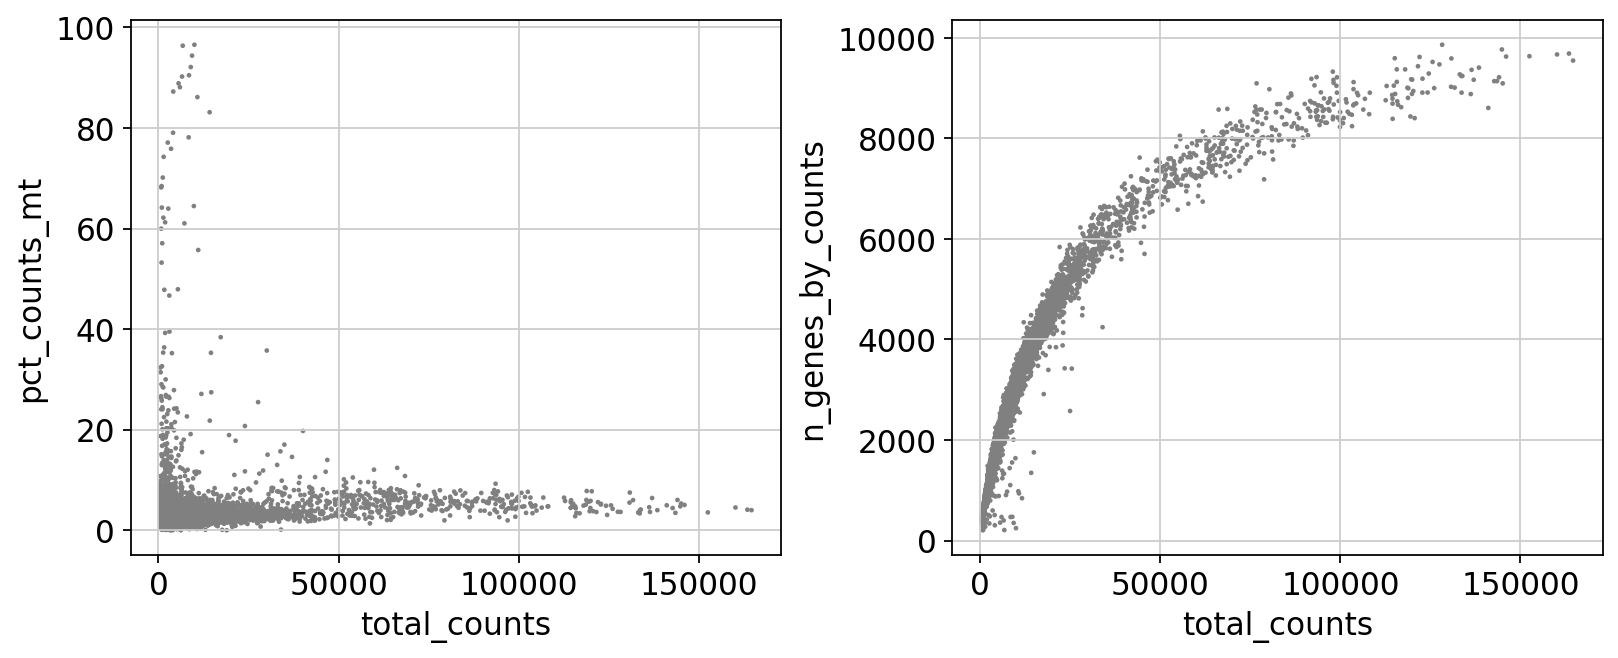

In [17]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
adata.var_names[:20] 
adata.var["mt"] = adata.var_names.str.startswith(("mt-", "Mt-"))
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
fig, axs = plt.subplots(1, 2, figsize=(10, 4), layout="constrained")
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt", show=False, ax=axs[0])
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts", show=False, ax=axs[1]);


In [18]:
adata = adata[
    (adata.obs.n_genes_by_counts < 2500)
    & (adata.obs.n_genes_by_counts > 200)
    & (adata.obs.pct_counts_mt < 5),
    :,
].copy()


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


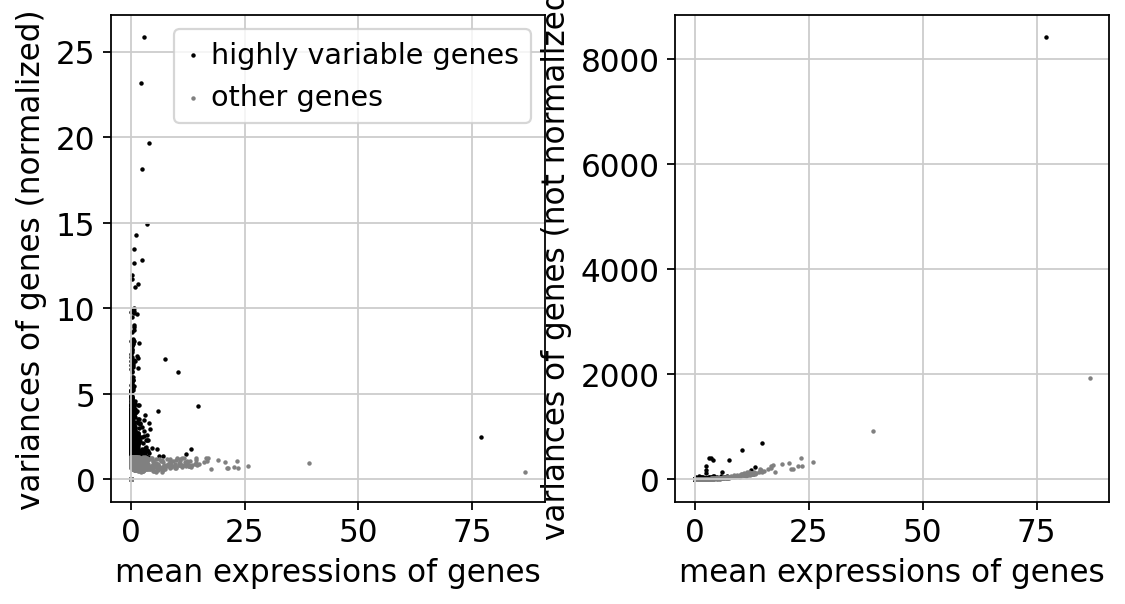

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)
                   gene_ids    feature_types  n_cells     mt  \
Sgk3     ENSMUSG00000025915  Gene Expression     1295  False   
Mcmdc2   ENSMUSG00000046101  Gene Expression      269  False   
Prex2    ENSMUSG00000048960  Gene Expression       40  False   
Eya1     ENSMUSG00000025932  Gene Expression      613  False   
Il17a    ENSMUSG00000025929  Gene Expression       18  False   
Il17f    ENSMUSG00000041872  Gene Expression       50  False   
Paqr8    ENSMUSG00000025931  Gene Expression      160  False   
Kcnq5    ENSMUSG00000028033  Gene Expression     3253  False   
Ogfrl1   ENSMUSG00000026158  Gene Expression     1168  False   
Prim2    ENSMUSG00000026134  Gene Expression     1897  False   
Dst      ENSMUSG00000026131  Gene Expression     1531  False   
Tmem131  ENSMUSG00000026116  Gene Expression     3142  False   
Aff3     ENSMUSG00000037138  Gene Expre

In [19]:
adata.layers["counts"] = adata.X.copy()
adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(
    adata,
    layer="counts",
    n_top_genes=2000,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    flavor="seurat_v3",
)
sc.pl.highly_variable_genes(adata)
adata.layers["scaled"] = adata.X.toarray()
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"], layer="scaled")
sc.pp.scale(adata, max_value=10, layer="scaled")
sc.pp.pca(adata, layer="scaled", svd_solver="arpack")
print(adata.var[adata.var["highly_variable"]].head(20))


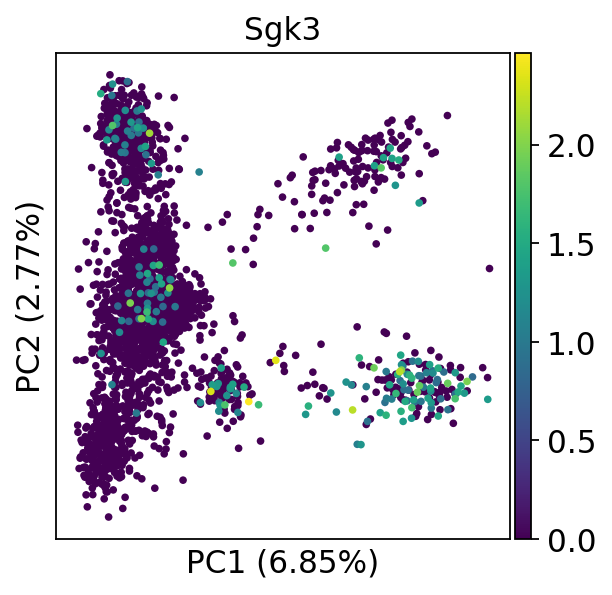

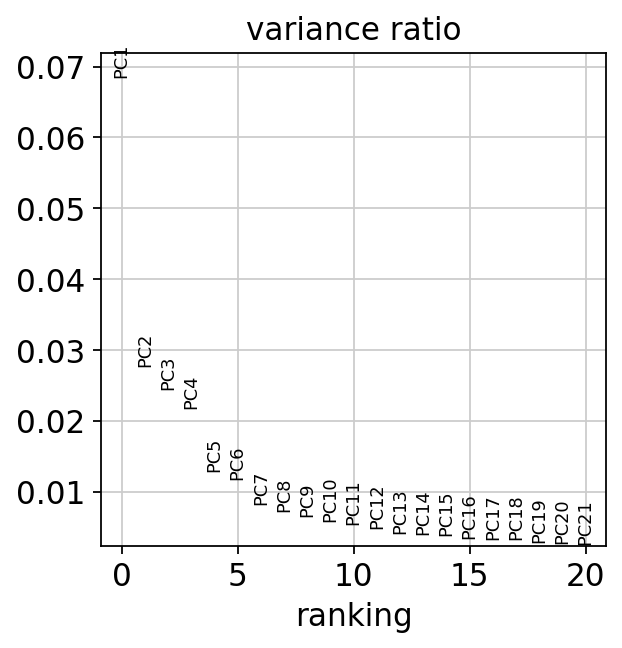

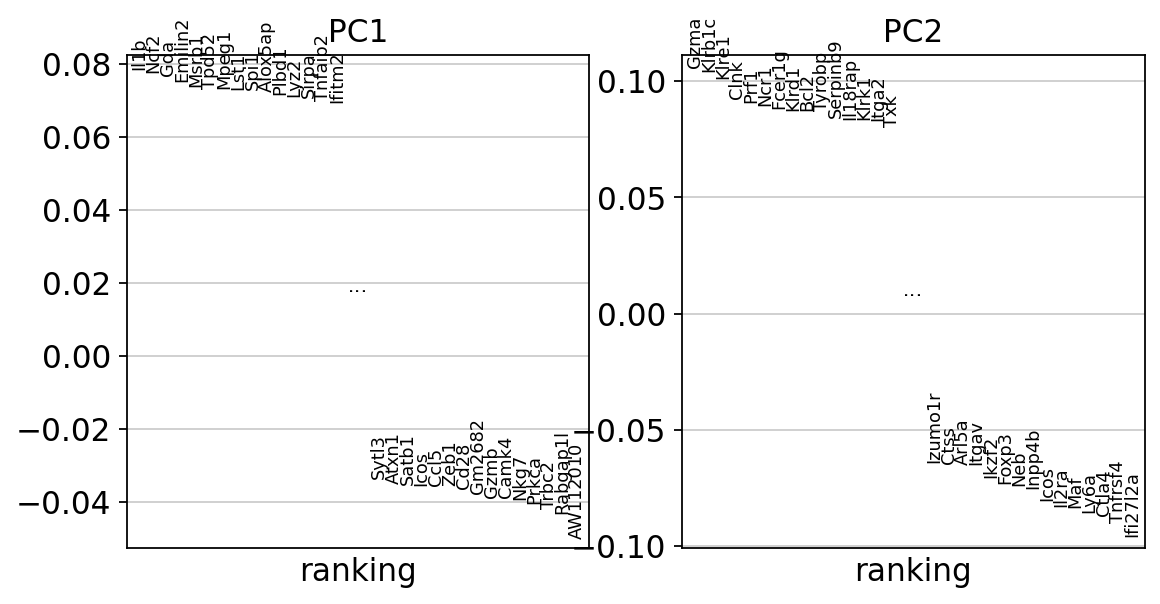

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00)


In [20]:
sc.pl.pca(adata, annotate_var_explained=True, color="Sgk3")
sc.pl.pca_variance_ratio(adata, n_pcs=20)
sc.pl.pca_loadings(adata, components=(1, 2), include_lowest=True)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


running Leiden clustering
    finished (0:00:00)
running PAGA
    finished (0:00:00)


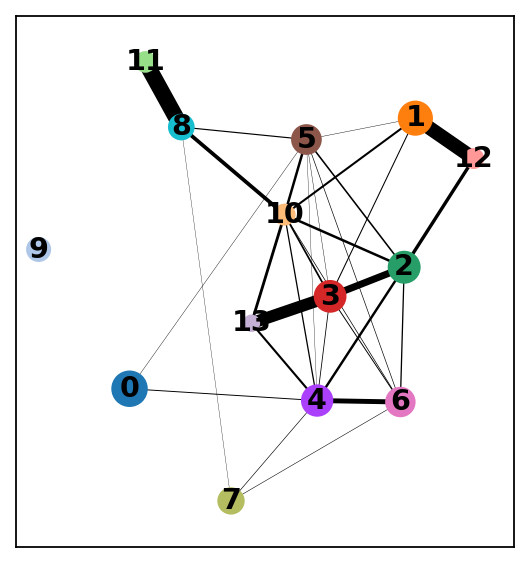

computing UMAP
    finished (0:00:03)


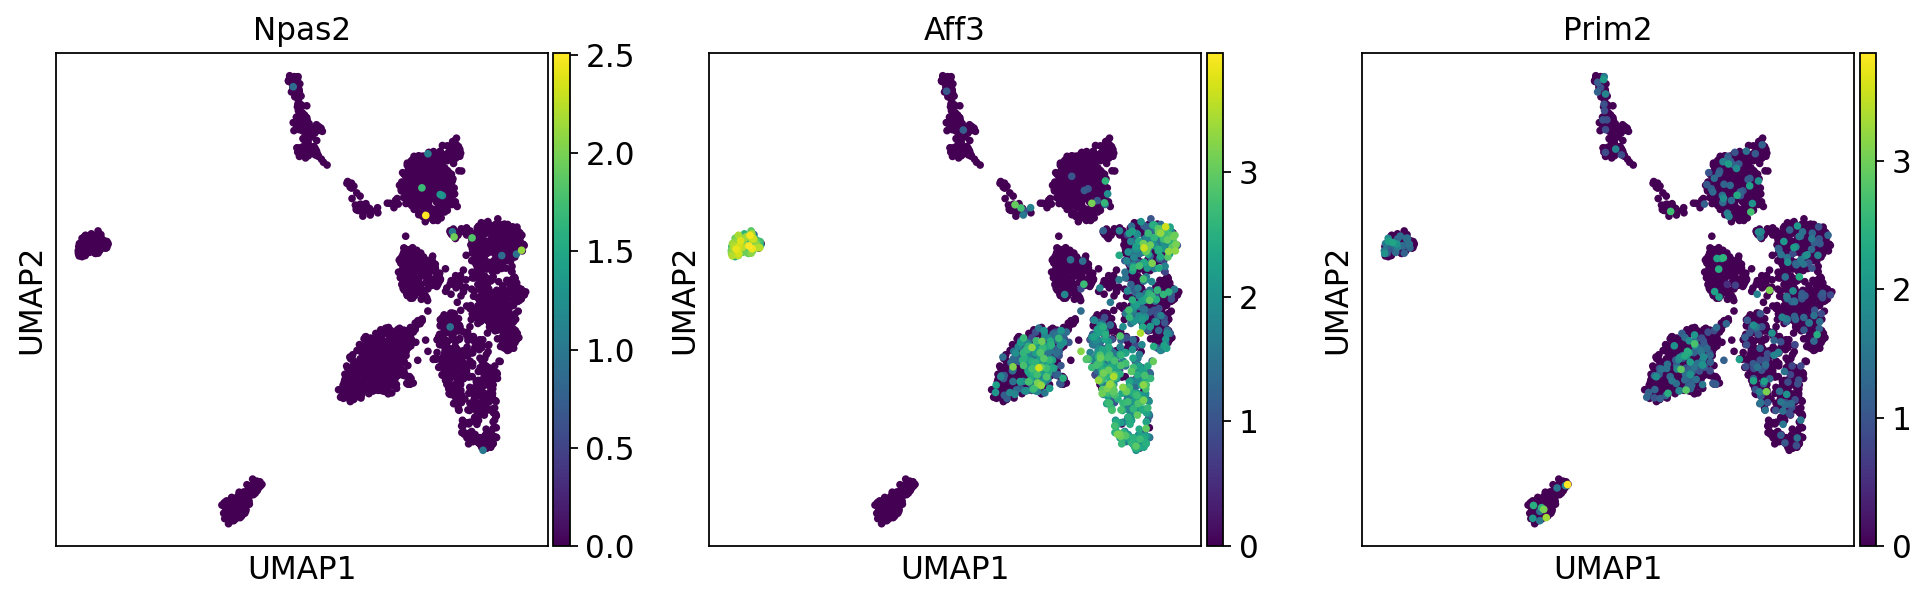

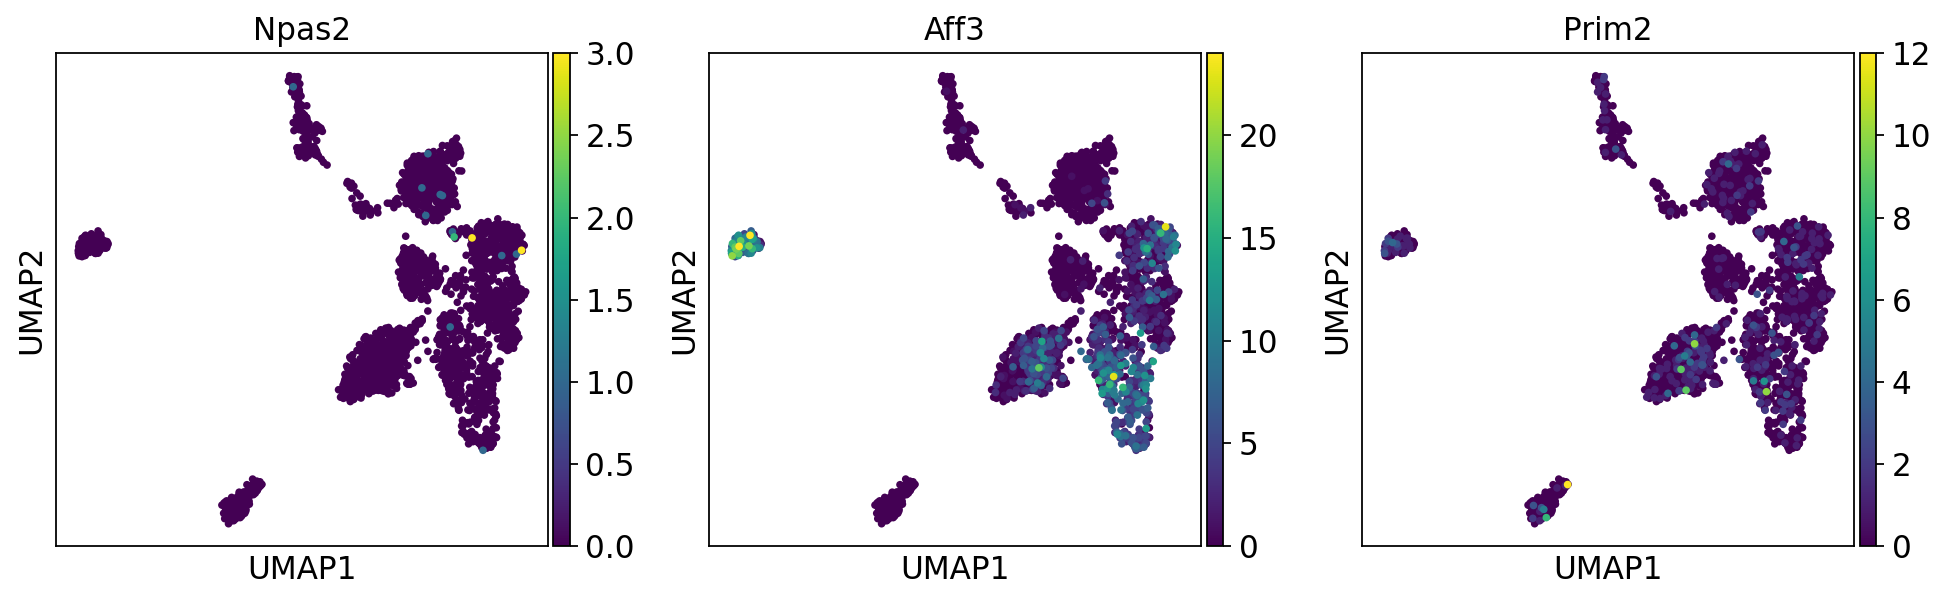

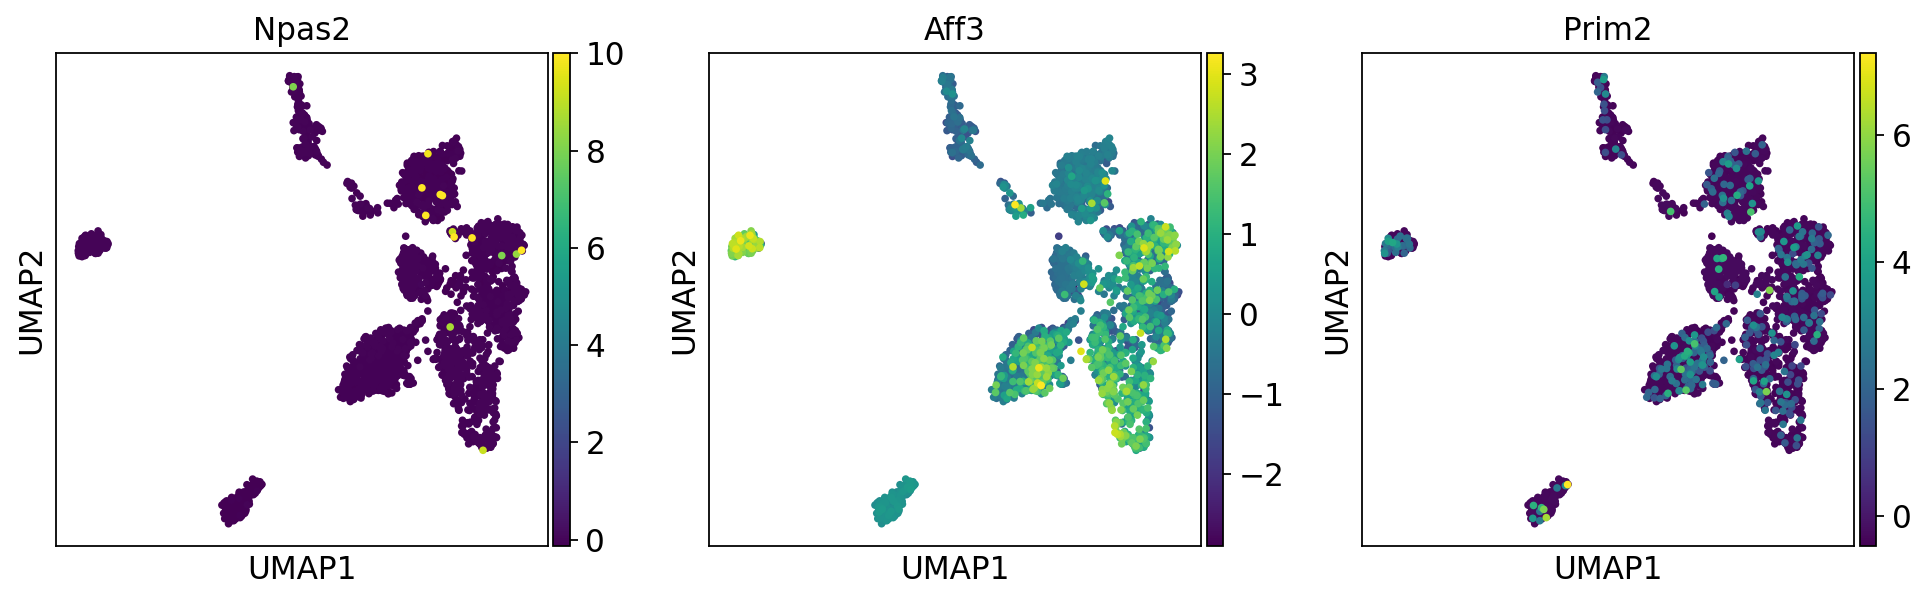

running Leiden clustering
    finished (0:00:00)


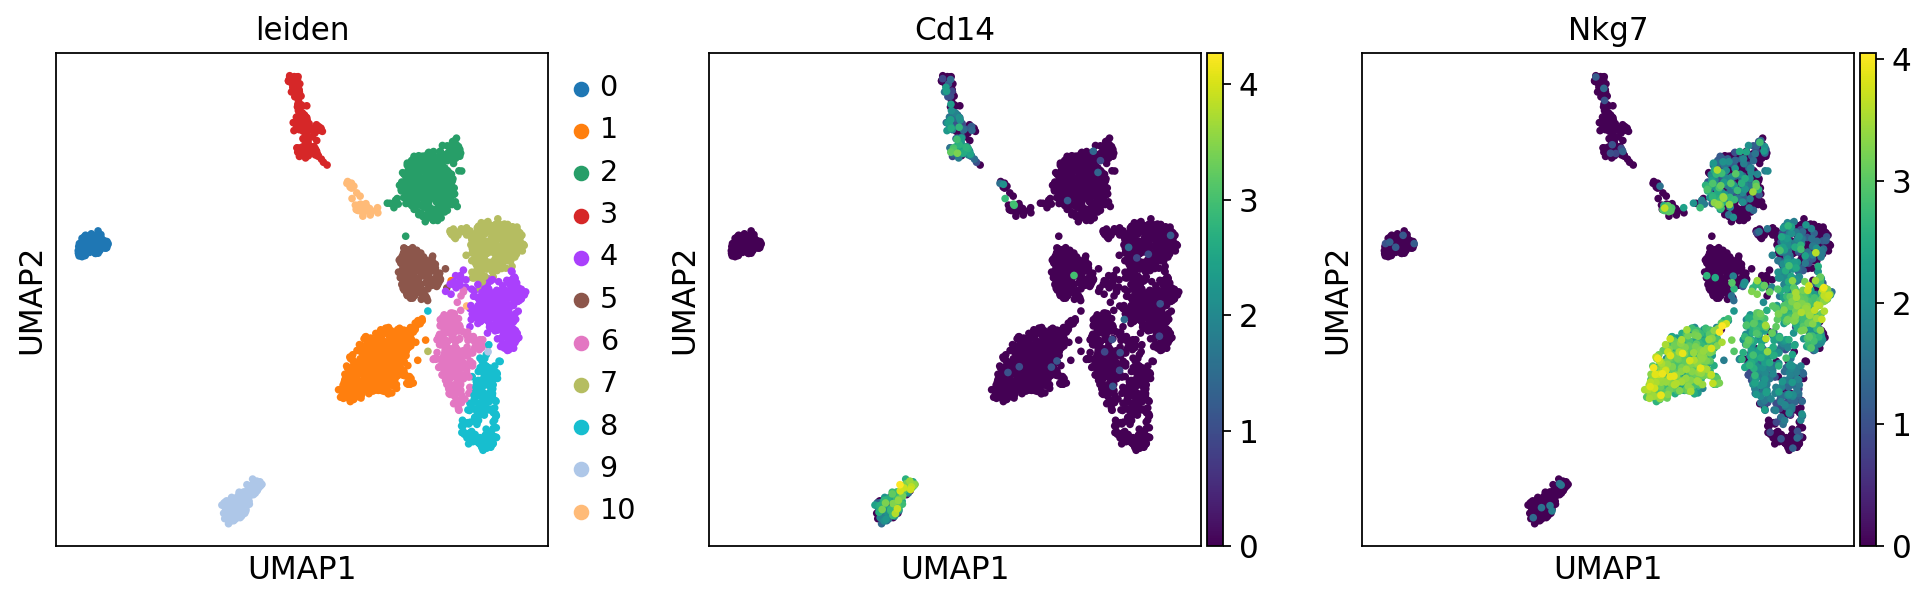

ranking genes
    finished (0:00:00)


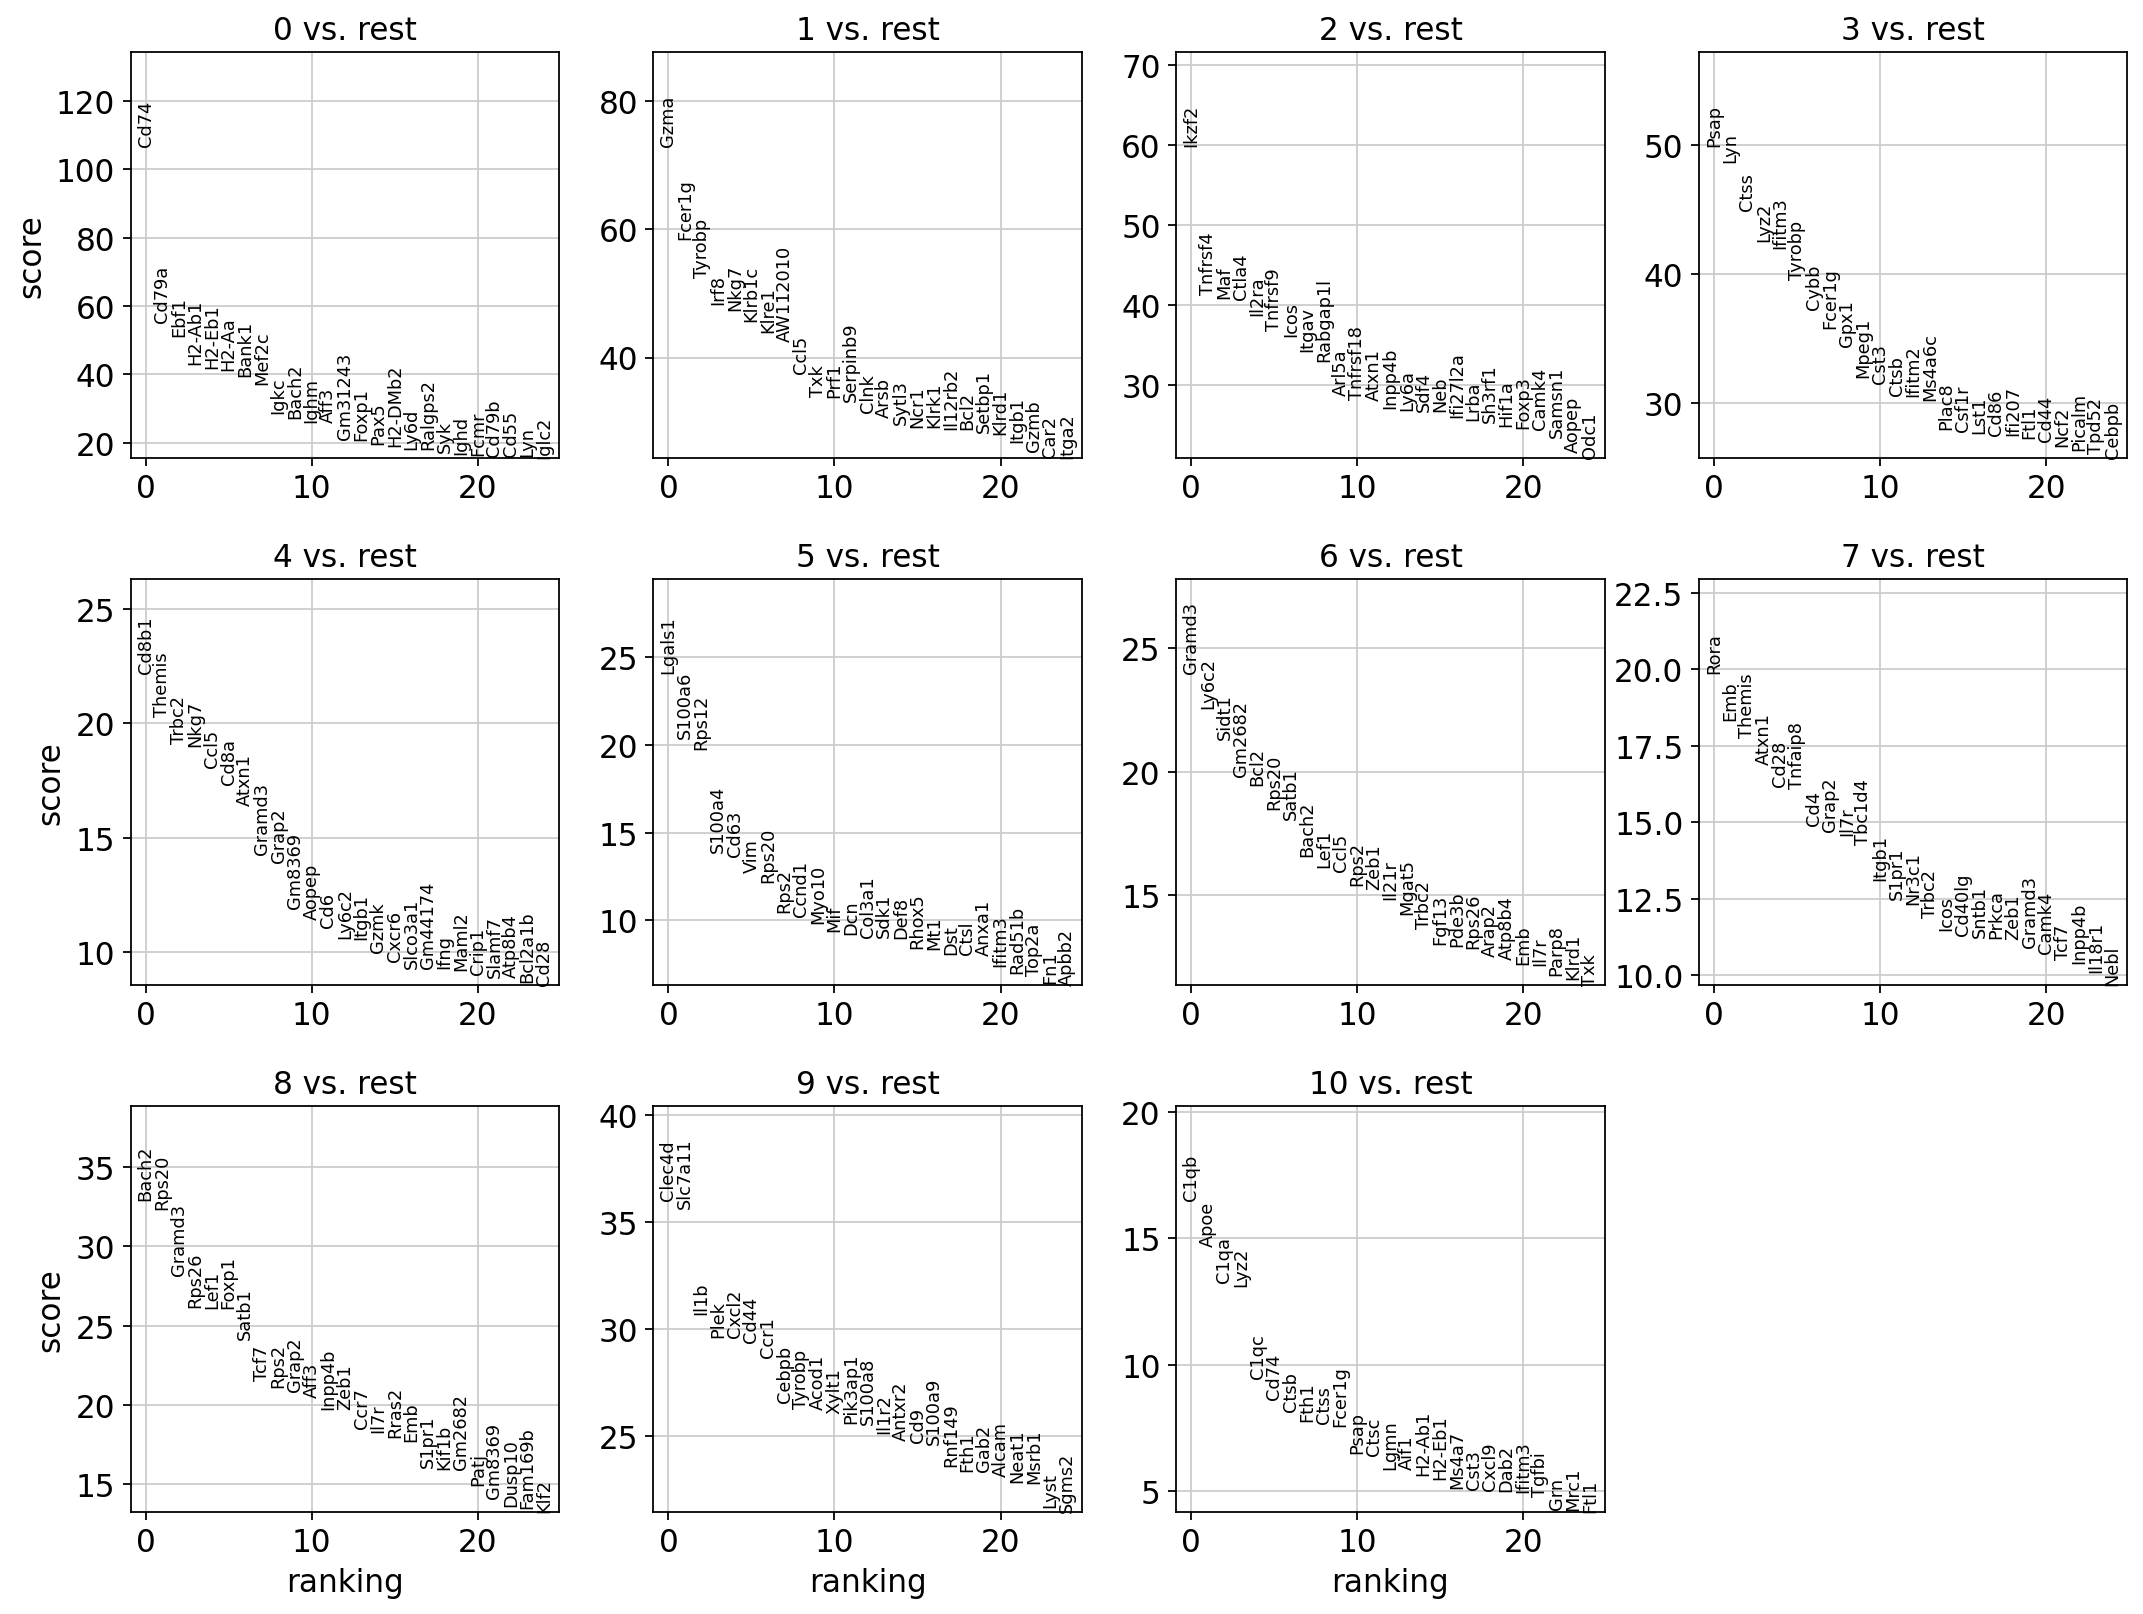

In [21]:
# 6) 聚类（得到群体标签）
sc.tl.leiden(adata, resolution=1.0, key_added="leiden")  
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.pl.paga(adata ) 
sc.tl.umap(adata, init_pos='paga')
sc.pl.umap(adata, color=["Npas2", "Aff3", "Prim2"])
sc.pl.umap(adata, color=["Npas2", "Aff3", "Prim2"], layer="counts")
sc.pl.umap(adata, color=["Npas2", "Aff3", "Prim2"], layer="scaled")
sc.tl.leiden(
    adata,
    resolution=0.7,
    random_state=0,
    flavor="igraph",
    n_iterations=2,
    directed=False,
)
adata.obs["leiden"] = adata.obs["leiden"].copy()
adata.uns["leiden"] = adata.uns["leiden"].copy()
adata.obsm["X_umap"] = adata.obsm["X_umap"].copy()
sc.pl.umap(adata, color=["leiden", "Cd14", "Nkg7"])
sc.tl.rank_genes_groups(adata, "leiden", mask_var="highly_variable", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


ranking genes
    finished (0:00:00)


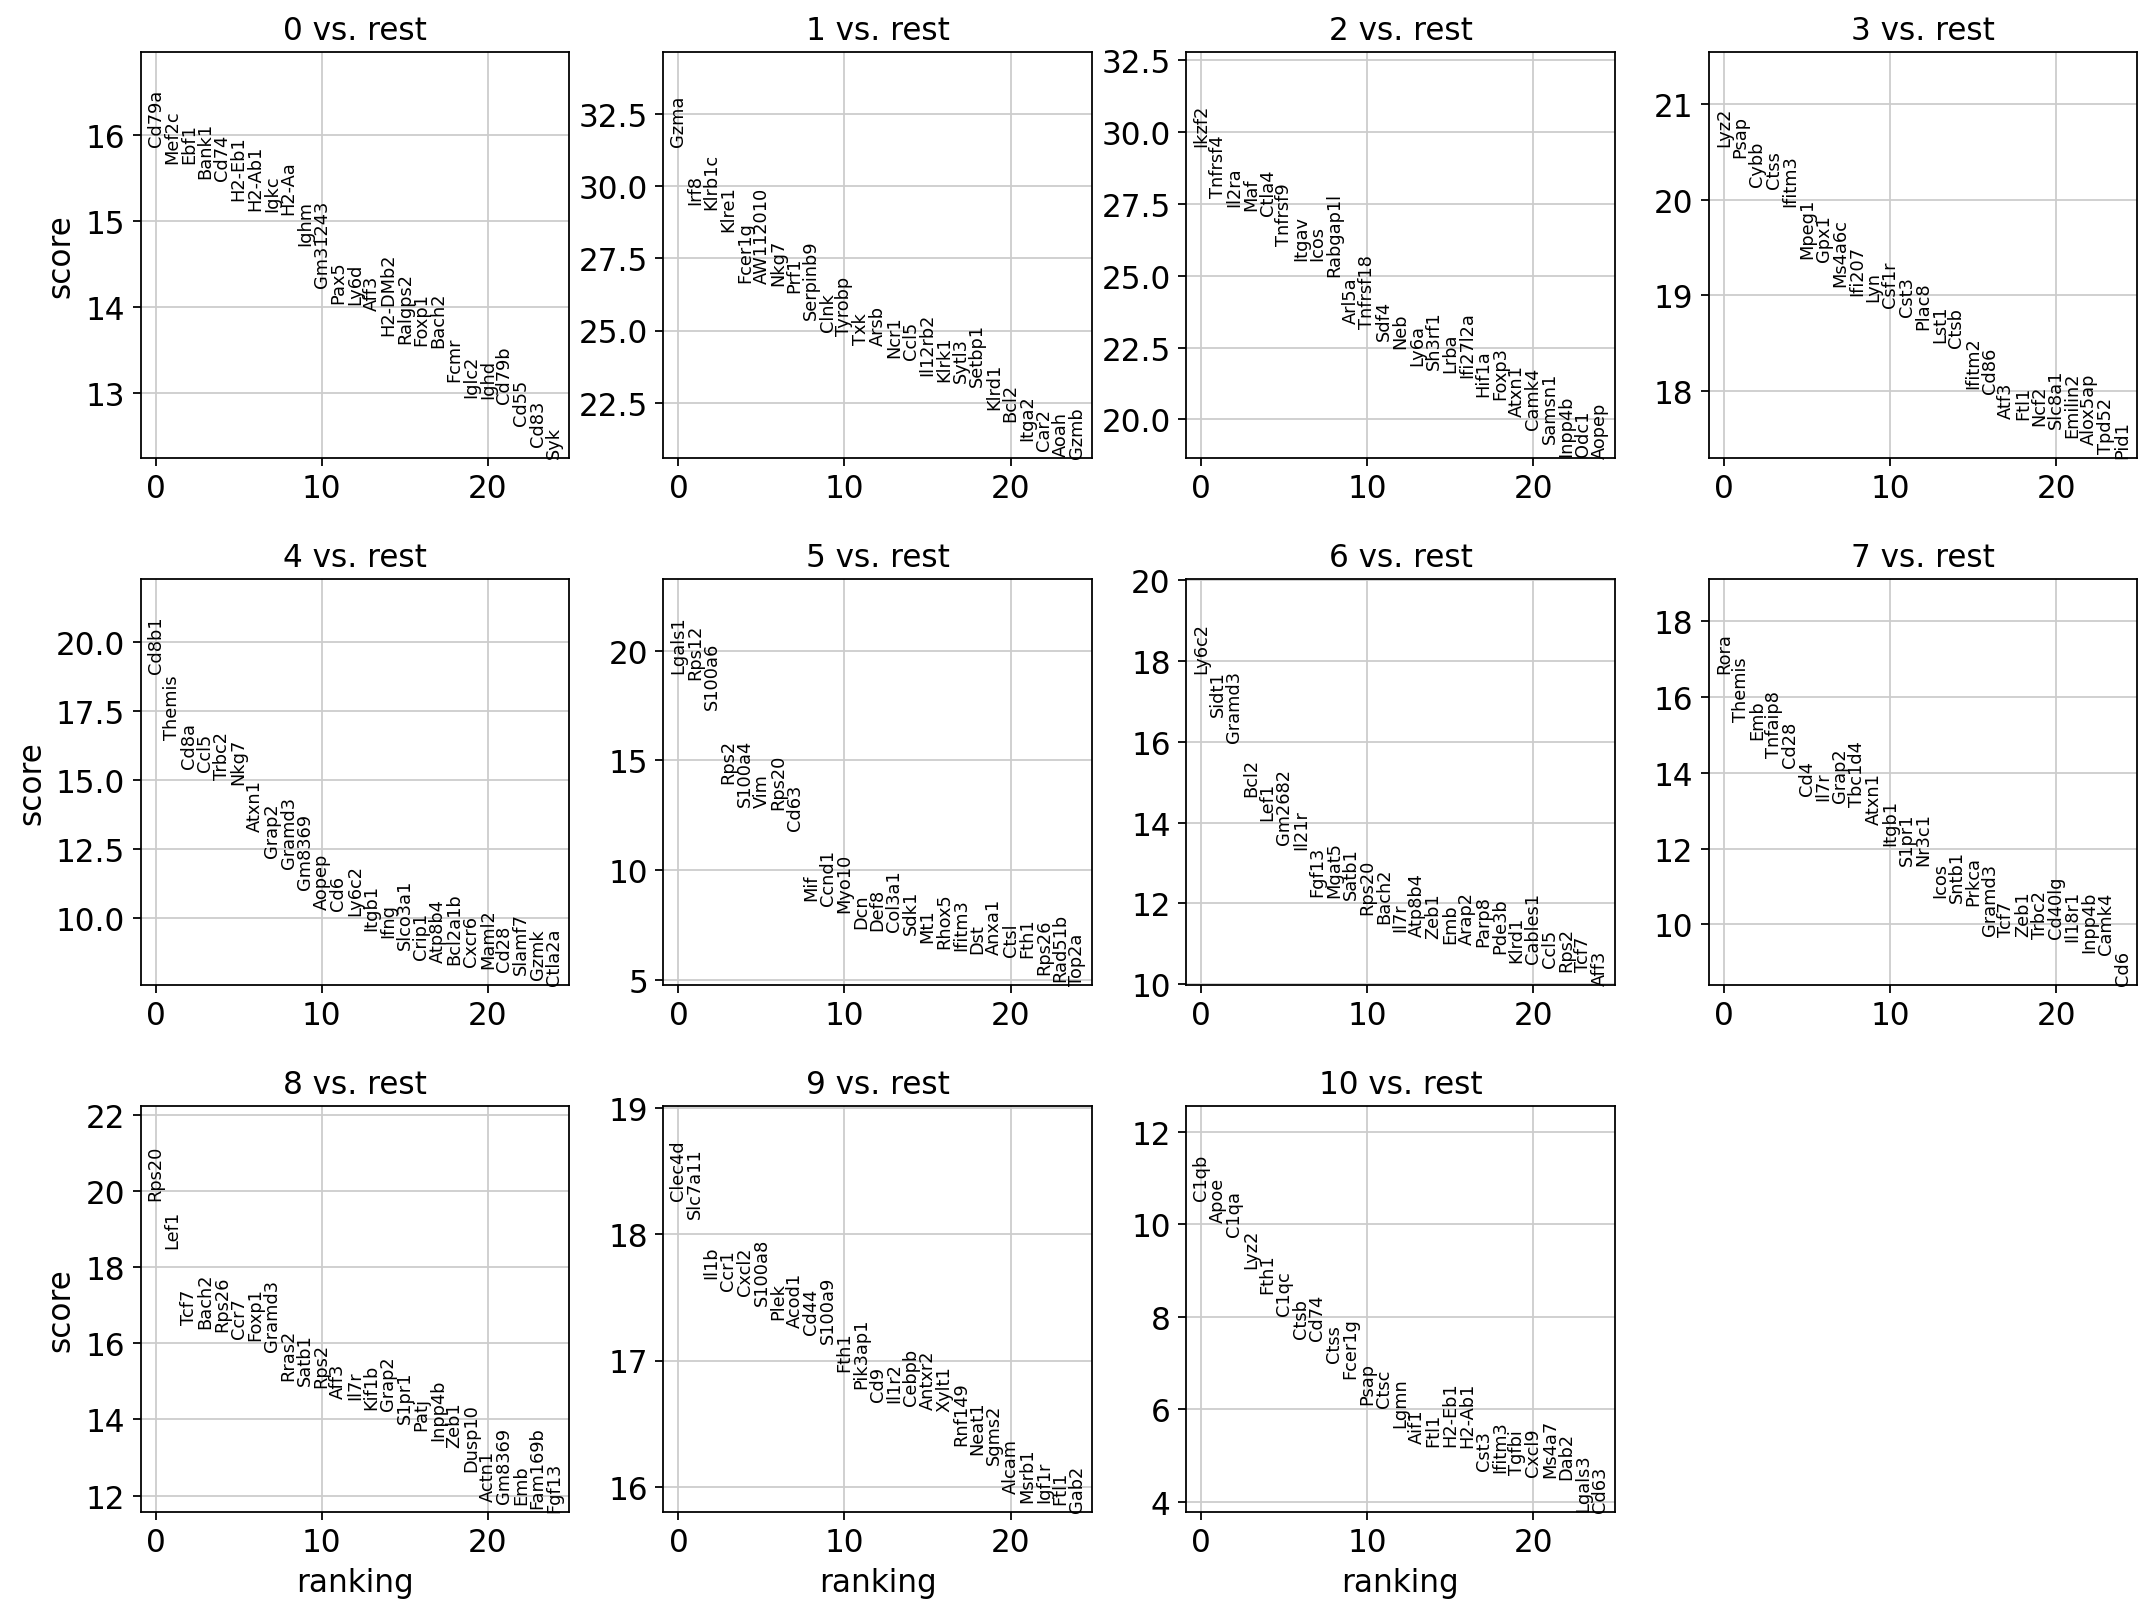

ranking genes
    finished (0:00:00)


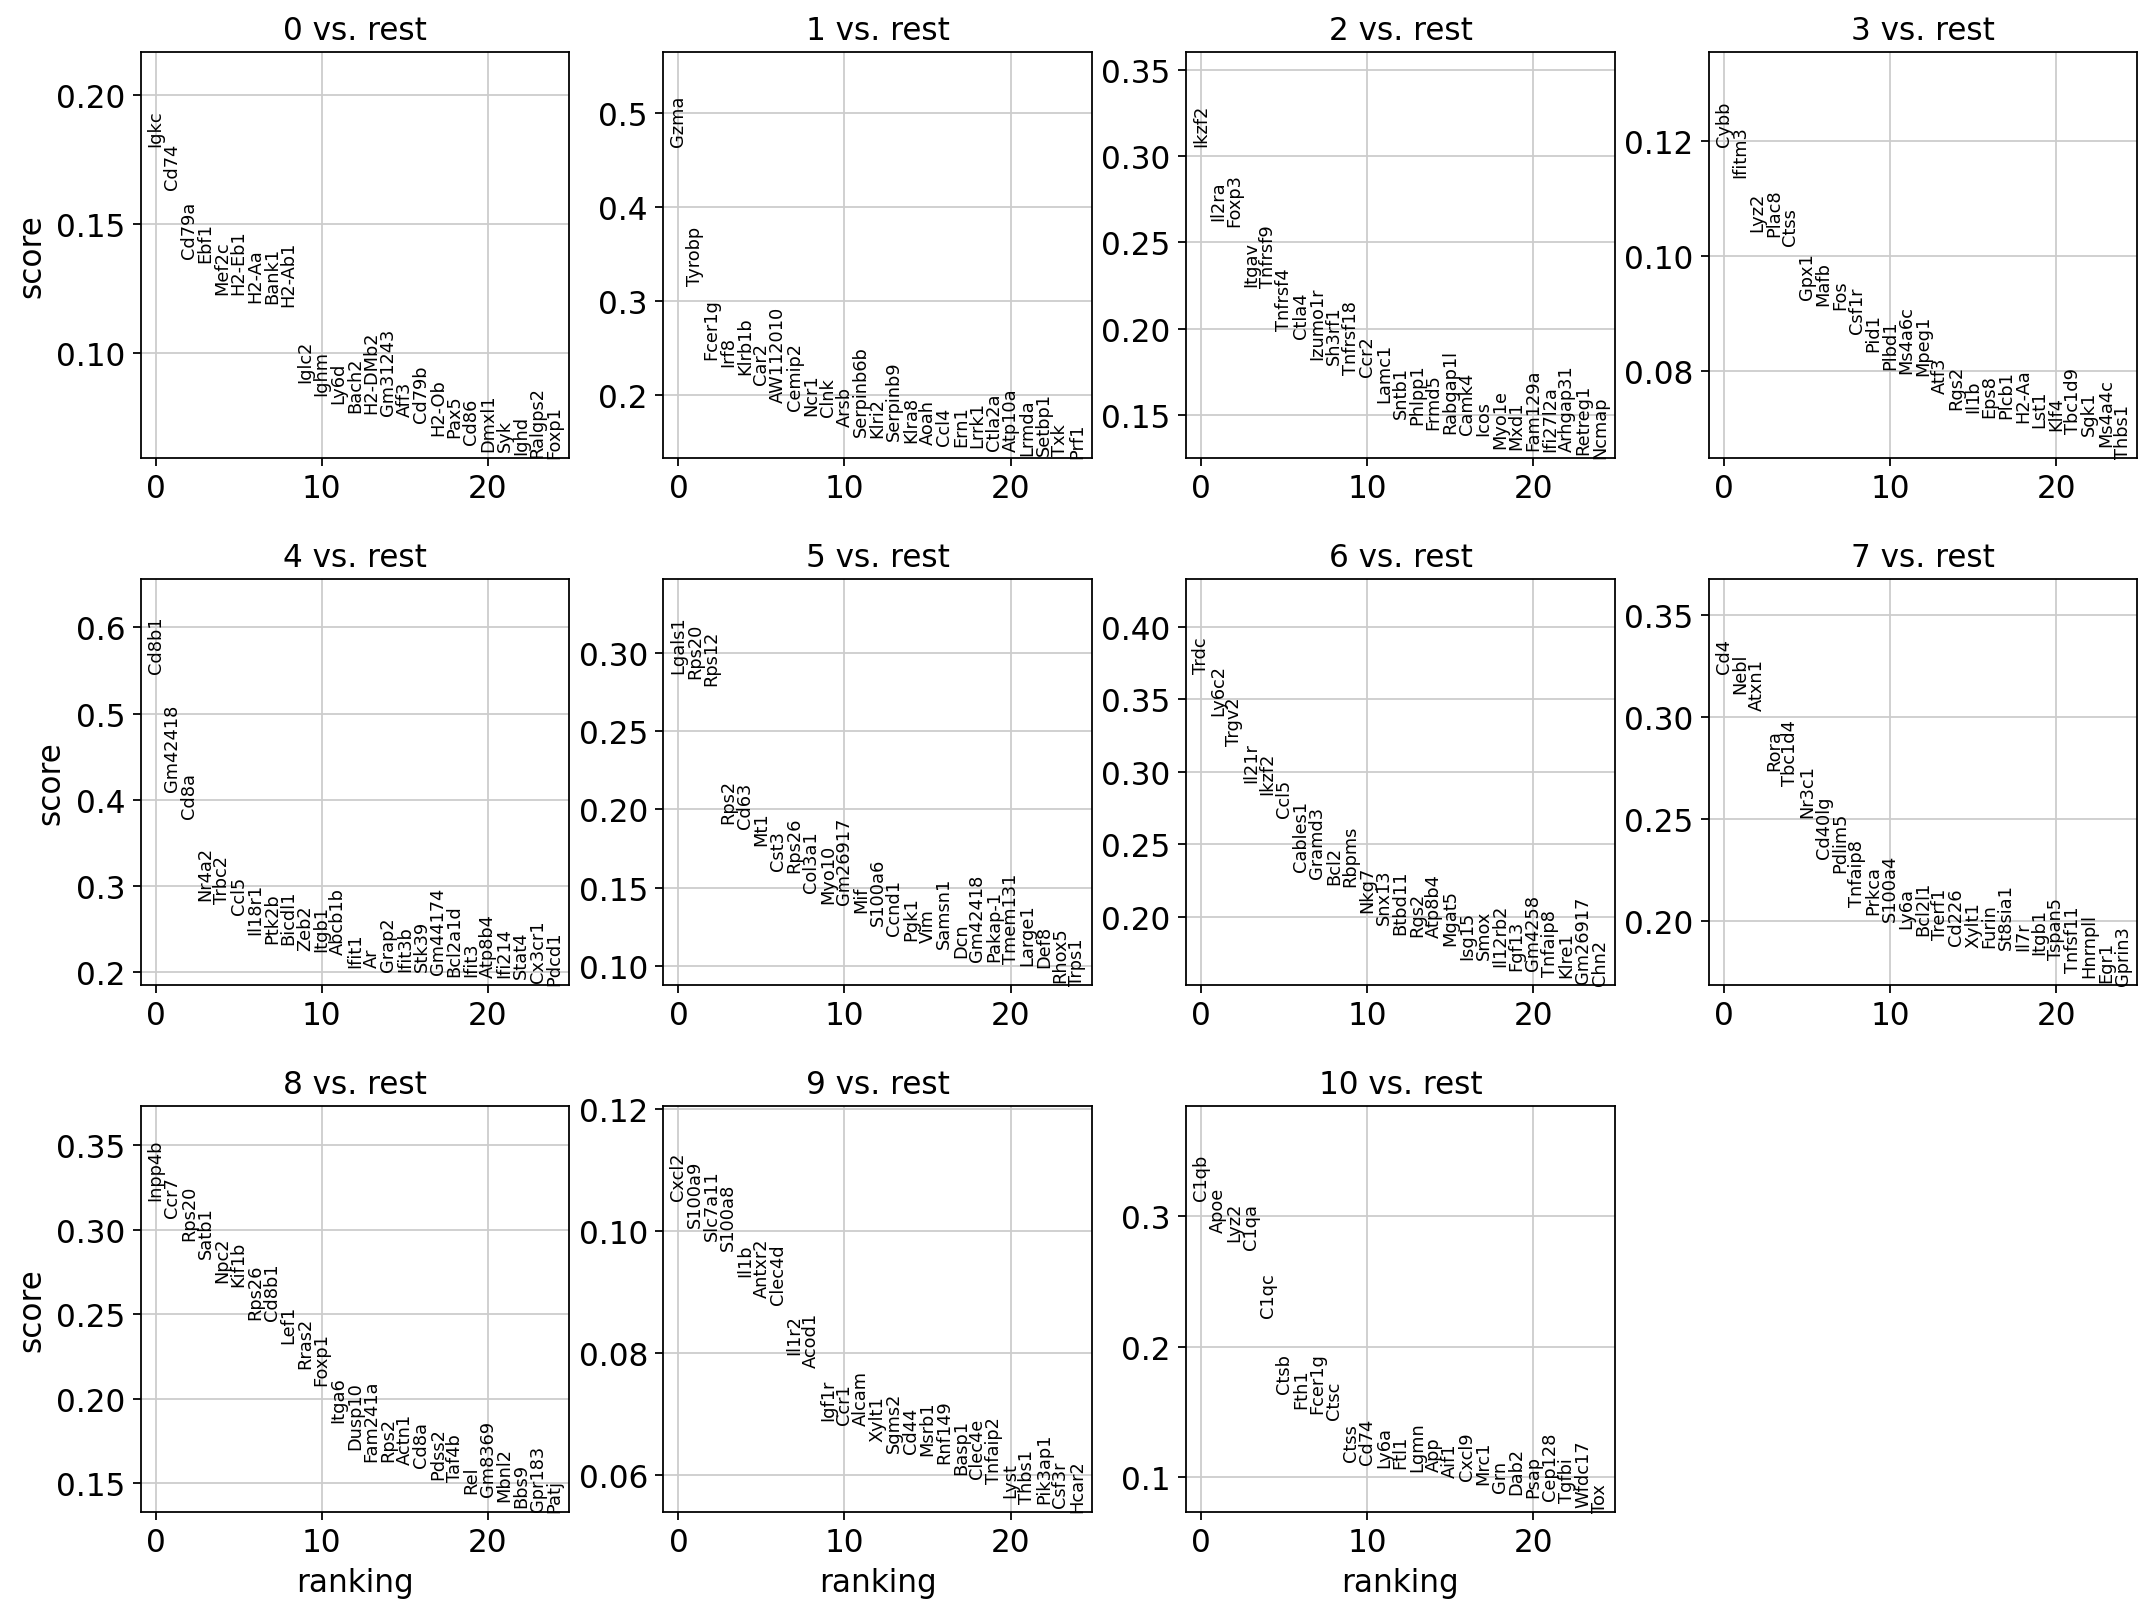

ranking genes
    finished (0:00:00)


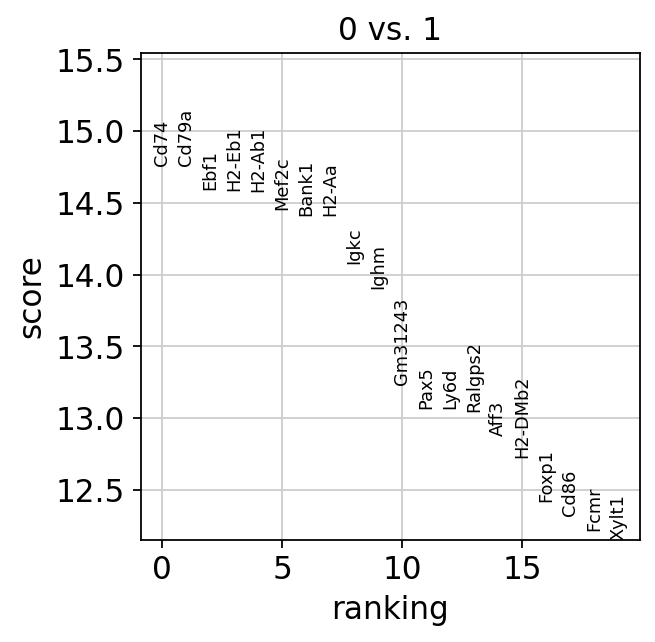

/home/dongfang/miniforge3/envs/bioinfo/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


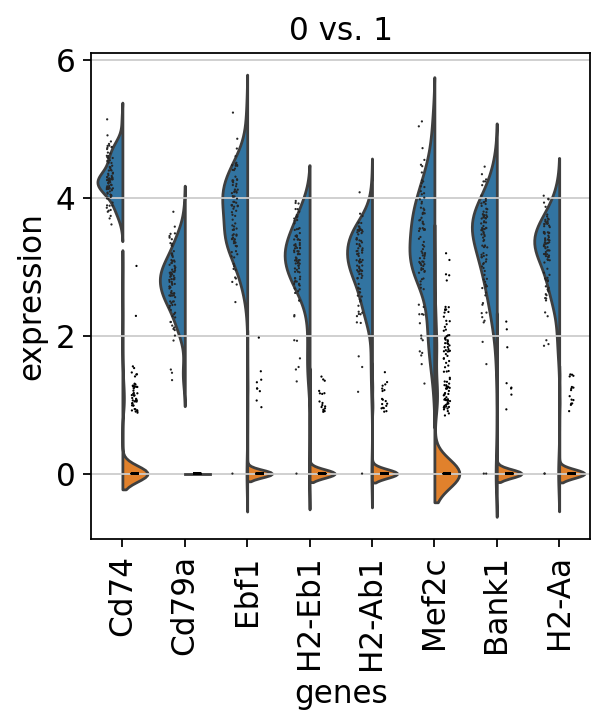

/home/dongfang/miniforge3/envs/bioinfo/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


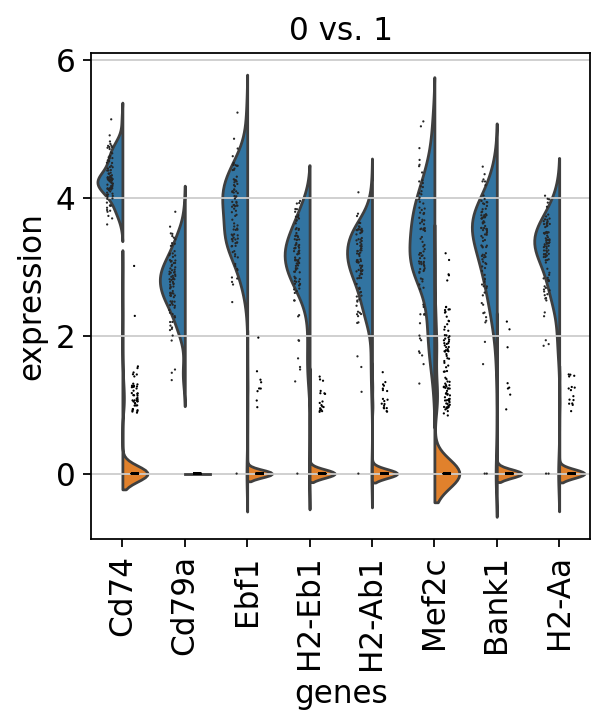

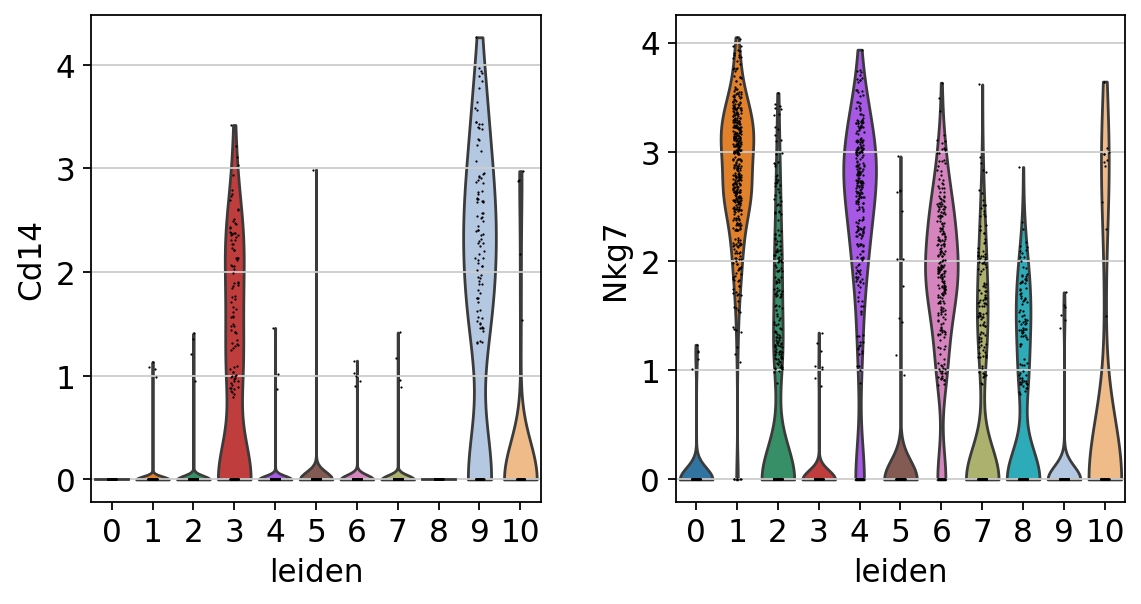

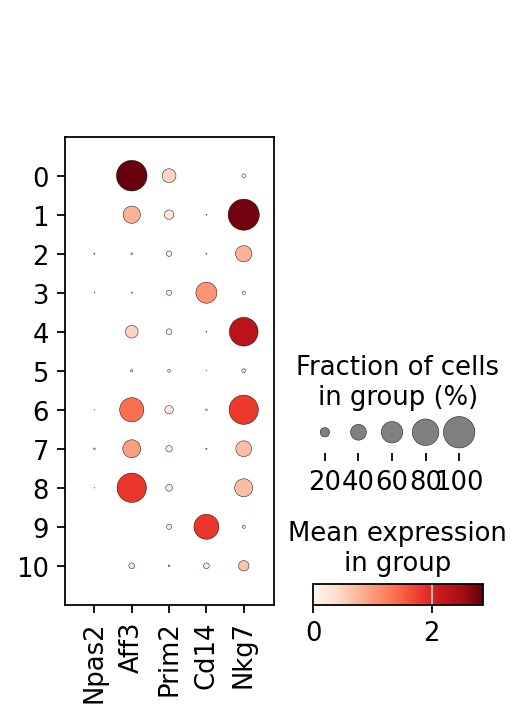

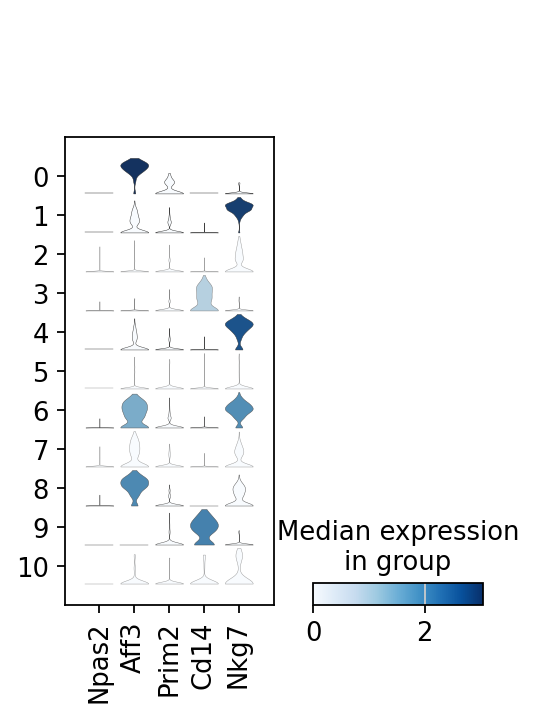

In [22]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, "leiden", mask_var="highly_variable", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
adata.write("huage.h5ad")
sc.tl.rank_genes_groups(
    adata, "leiden", mask_var="highly_variable", method="logreg", max_iter=1000
)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
sc.tl.rank_genes_groups(
    adata,
    "leiden",
    mask_var="highly_variable",
    groups=["0"],
    reference="1",
    method="wilcoxon",
)
sc.pl.rank_genes_groups(adata, groups=["0"], n_genes=20)
sc.pl.rank_genes_groups_violin(adata, groups="0", n_genes=8)
sc.pl.rank_genes_groups_violin(adata, groups="0", n_genes=8)
sc.pl.violin(adata, [ "Cd14", "Nkg7"], groupby="leiden")
sc.pl.dotplot(adata,[ "Npas2", "Aff3", "Prim2","Cd14", "Nkg7"], groupby="leiden")
sc.pl.stacked_violin(adata, [ "Npas2", "Aff3", "Prim2","Cd14", "Nkg7"], groupby="leiden")